In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from pprint import pp
import seaborn as sns

## Data import

In [2]:
data = pd.read_csv("../data/train.csv", delimiter=';')
data["overcrowding"] = data["overcrowding"].str.replace(",", ".").astype("float")
data["meaneduc"] = data["meaneduc"].str.replace(",", ".").astype("float")

In [3]:
X = data.drop(columns="target")
y = data["target"]

In [43]:
X.shape

(7639, 91)

<AxesSubplot: >

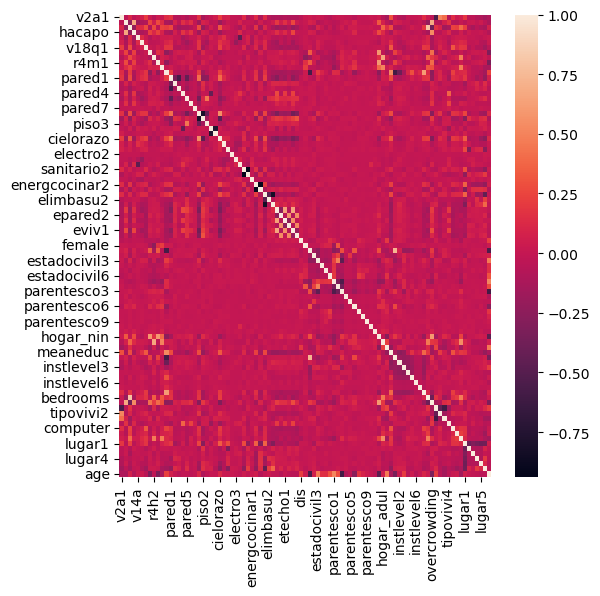

In [4]:
plt.figure(figsize= (6, 6))
sns.heatmap(X.corr())

In [5]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, train_size=0.7)

## Neural network

In [16]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20), random_state=1, max_iter=10000)
clf.fit(train_X, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=20, max_iter=10000,
              random_state=1)

In [17]:
clf.score(val_X, val_y)

0.7613438045375218

In [25]:
test = []
test.append(5)

print(test)

[5]


[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [55]:
irange = np.arange(1,10)
jrange = np.arange(1,10)
scores = np.zeros((len(irange), len(jrange)))
for i, ival in enumerate(irange):
    for j, jval in enumerate(jrange):
        clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(ival, jval), random_state=1, max_iter=1000000)
        clf.fit(train_X, train_y)
        score = clf.score(val_X, val_y)
        scores[i][j] = score

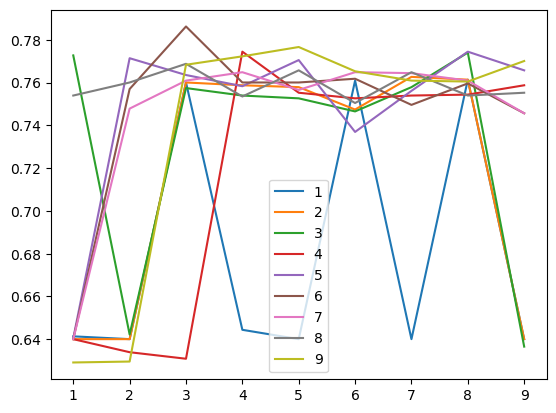

In [56]:
for score in scores:
    plt.plot(jrange, score)
    
plt.legend(irange)

## Hyperparameter estimation

In [57]:
param_grid = [
    {
        'solver': ['lbfgs', 'adam'],
        'alpha': [1e-5],
        'hidden_layer_sizes': [(i,j) for i in np.arange(1,20,2) for j in np.arange(1,20,2)],
        'random_state': [1],
        'max_iter': [100000],
    },
]
grid = GridSearchCV(
    MLPClassifier(), 
    param_grid, 
    cv=5,
    verbose = 1,
    refit = True, 
    n_jobs=-1 
    ) 

In [58]:
# fitting the model for grid search 
grid.fit(train_X, train_y) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [1e-05],
                          'hidden_layer_sizes': [(1, 1), (1, 3), (1, 5), (1, 7),
                                                 (1, 9), (1, 11), (1, 13),
                                                 (1, 15), (1, 17), (1, 19),
                                                 (3, 1), (3, 3), (3, 5), (3, 7),
                                                 (3, 9), (3, 11), (3, 13),
                                                 (3, 15), (3, 17), (3, 19),
                                                 (5, 1), (5, 3), (5, 5), (5, 7),
                                                 (5, 9), (5, 11), (5, 13),
                                                 (5, 15), (5, 17), (5, 19), ...],
                          'max_iter': [100000], 'random_state': [1],
                          'solver': ['lbfgs', 'adam']}],
             verbose=1)

In [59]:
# print best parameter after tuning 
pp(grid.best_params_) 
grid_predictions = grid.predict(val_X) 

# print classification report 
print("\n" + classification_report(val_y, grid_predictions)) 

{'alpha': 1e-05,
 'hidden_layer_sizes': (11, 9),
 'max_iter': 100000,
 'random_state': 1,
 'solver': 'adam'}

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1467
           1       0.78      0.55      0.65       825

    accuracy                           0.78      2292
   macro avg       0.78      0.73      0.75      2292
weighted avg       0.78      0.78      0.77      2292



In [ ]:
best_params = {'alpha': 1e-05,
 'hidden_layer_sizes': (11, 9),
 'max_iter': 100000,
 'random_state': 1,
 'solver': 'adam'}